In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
df = pd.read_parquet('morizon_sale_2019_10_05T09_42_17.parquet')

In [27]:
df.head()

,balcony,building_height,building_material,building_type,building_year,desc_len,direct,flat_state,floor,heating,...,building_material_concrete_slab,building_material_other,building_type_apart,building_type_block,building_type_hist,building_type_house,building_type_other,coords_mean_price_m2,coords_category,coords_center_distance
0,1.0,4.0,3,2,0.0,880,0,3,4.0,3.0,...,0,0,0,0,0,0,1,9795.452994,1365,2.291
1,0.0,4.0,3,1,61.0,1227,0,1,3.0,3.0,...,0,0,0,1,0,0,0,3170.730000,775,0.000
2,0.0,1.0,3,2,99.0,947,0,3,1.0,3.0,...,0,0,0,0,0,0,1,4700.798000,1142,0.000
3,0.0,3.0,1,1,37.0,1537,0,4,3.0,3.0,...,1,0,0,1,0,0,0,5877.983805,1258,5.144
4,1.0,2.0,1,1,27.0,1523,0,4,0.0,3.0,...,1,0,0,1,0,0,0,1613.543333,231,0.756


In [28]:
df = df.rename({
    'coords_mean_price_m2': 'coords_cluster_mean_price_m2',
    'coords_center_distance': 'coords_cluster_center_dist_km',
    'foor_n': 'floor_n'}, axis=1)

In [29]:
df['building_year'] = (df['building_year'] * -1 + 2019).astype('int64')
df = df.drop('coords_category', axis=1)
df['coords_cluster_center_dist_km'] = df.loc[df['coords_cluster_center_dist_km'] < 2, 'coords_cluster_center_dist_km']

In [30]:
interesting_cols = [
    'price_m2',
    'coords_cluster_mean_price_m2',
    'building_type',
    'flat_state',
    'coords_cluster_center_distance_km',
    'building_year',
    'building_height',
]

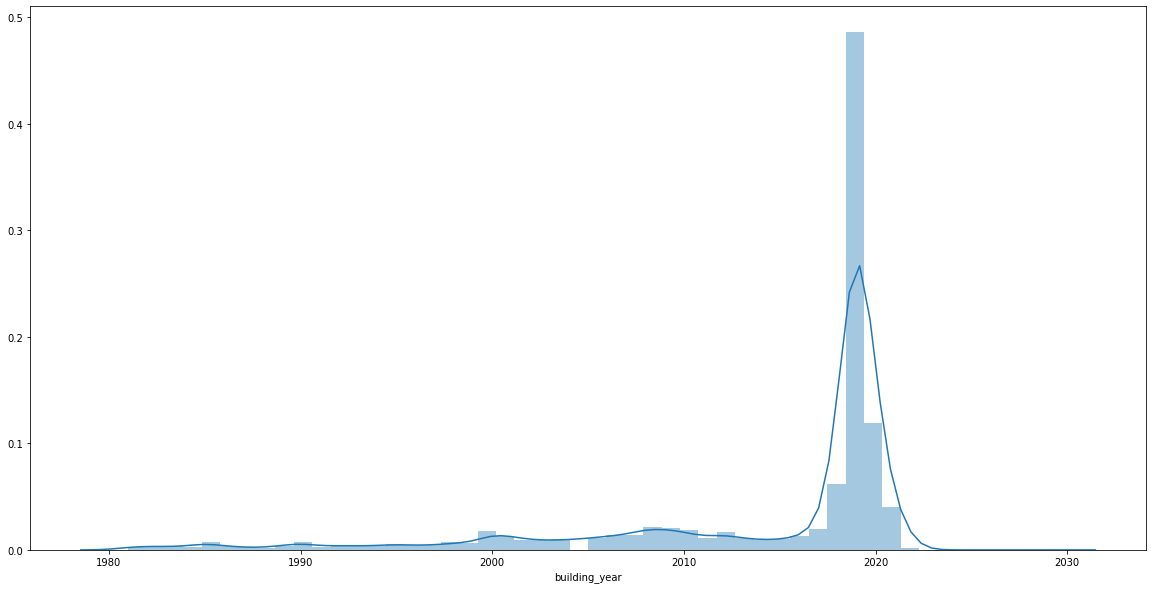

In [31]:
figure = plt.figure(figsize=(20, 10))
sns.distplot(df.loc[df['building_year'] > 1980, 'building_year'])

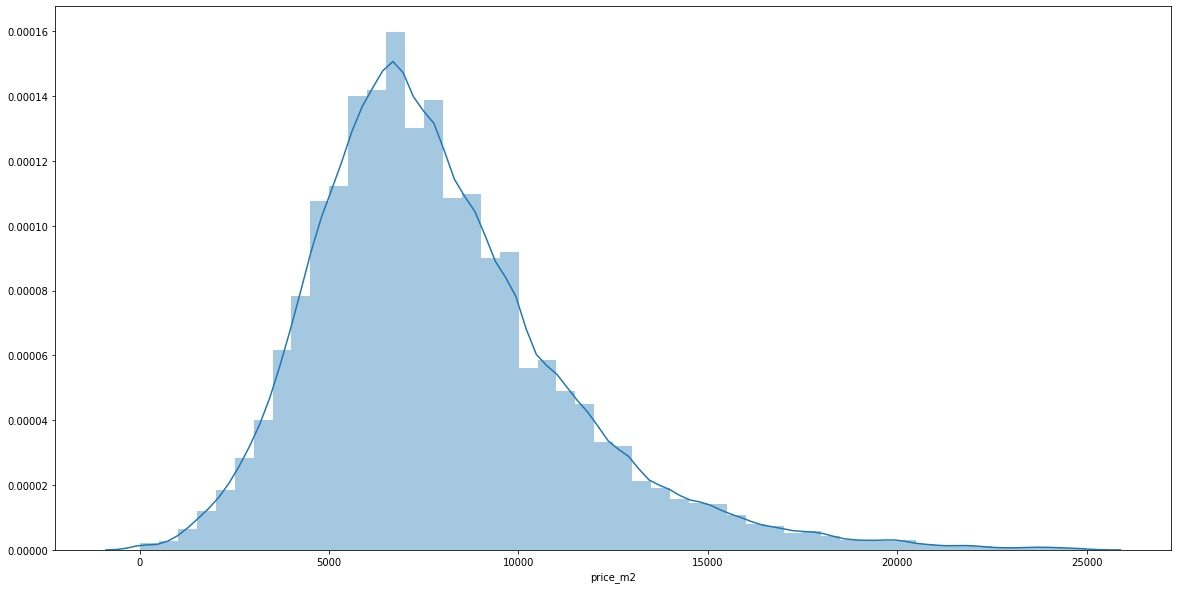

In [32]:
figure = plt.figure(figsize=(20, 10))
sns.distplot(df.loc[df['price_m2'] < 25000, 'price_m2'])

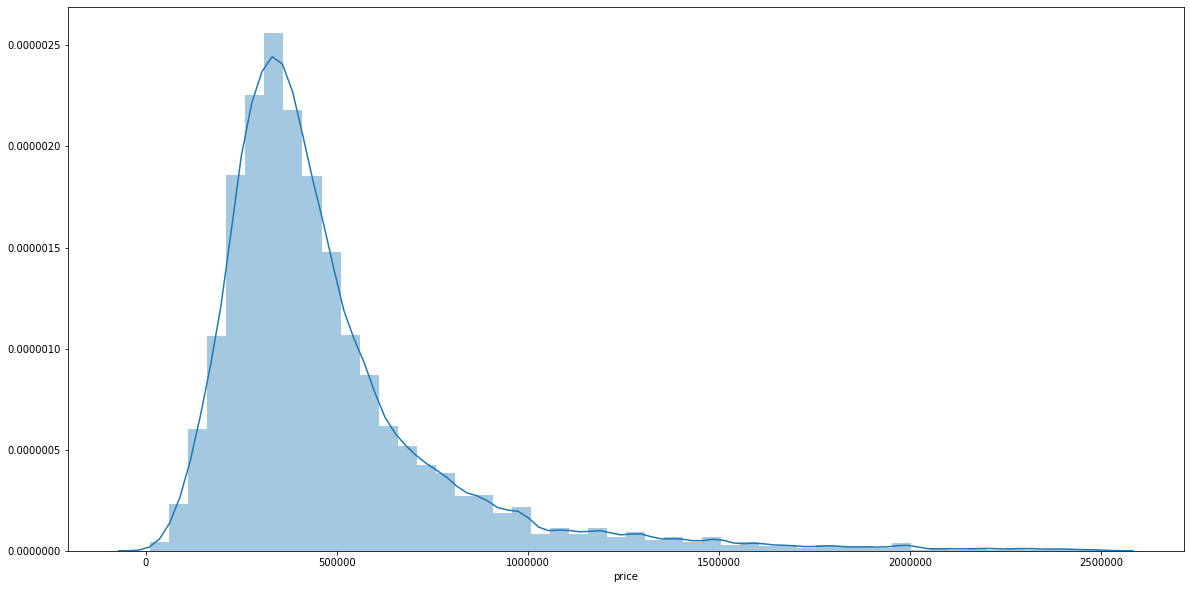

In [33]:
figure = plt.figure(figsize=(20, 10))
sns.distplot(df.loc[df['price'] < 2500000, 'price'])

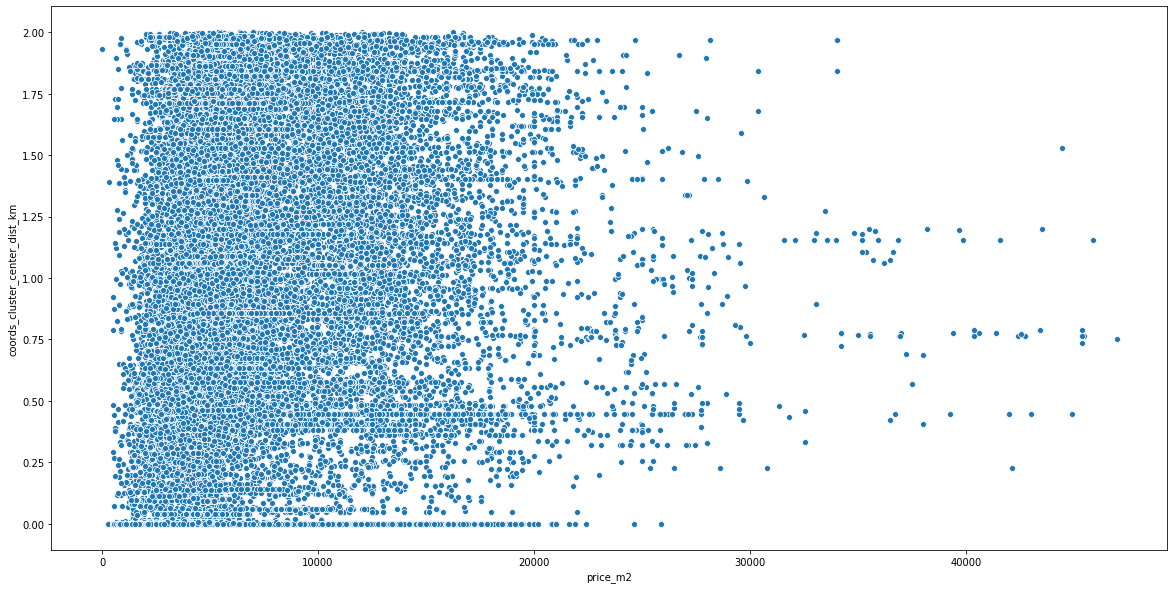

In [34]:
figure = plt.figure(figsize=(20, 10))
sns.scatterplot(df['price_m2'], df['coords_cluster_center_dist_km'])

In [35]:
df['coords_cluster_center_dist_km'].value_counts()

0.000    4450
0.856    1243
0.446     818
0.040     517
1.769     467
1.711     451
1.400     408
1.091     334
1.606     299
0.005     274
1.435     252
1.529     233
1.087     232
0.896     232
0.591     217
0.577     210
0.686     202
1.984     186
1.846     180
1.863     174
0.997     167
0.635     165
1.752     162
0.404     161
0.061     156
1.904     155
1.754     153
0.383     153
0.907     151
0.001     149
         ... 
1.802       1
0.022       1
0.207       1
0.053       1
0.127       1
0.036       1
0.012       1
0.805       1
0.019       1
0.080       1
0.008       1
0.175       1
0.387       1
0.190       1
0.181       1
0.030       1
0.075       1
0.035       1
0.068       1
0.023       1
0.177       1
0.278       1
0.034       1
0.064       1
0.996       1
1.923       1
0.049       1
0.016       1
0.244       1
0.301       1
Name: coords_cluster_center_dist_km, Length: 1984, dtype: int64